In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
def aggregate_predsV2(fold_predsFile):
    fold_preds = pd.read_csv(fold_predsFile+"/preds.csv")
    aggregate_pred = fold_preds['0']
    acc = [None] * 10
    mse = [None] * 10
    for i in range(0,10):
        acc[i] = accuracy_score(fold_preds[str(i)].round().astype("int"), y_true.age)
        mse[i] = mean_squared_error(fold_preds[str(i)], y_true.age)
        if i >= 1:
            aggregate_pred += fold_preds[str(i)]

    aggregate_pred = aggregate_pred/10.0    
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), y_true.age)
    mse_mean = mean_squared_error(aggregate_pred, y_true.age)
    print(fold_predsFile+ ":\t\t\t\t"+str(acc_mean) + " " + str(mse_mean))
    return acc, acc_mean, mse, mse_mean, aggregate_pred, fold_preds

def aggregate_predsV1(fold_predsFile):
    t = [None] * 10
    for i in range(0,10):
        t[i] = pd.read_csv(fold_predsFile+"/test_set_"+str(i)+".csv") 
    
    acc = [None] * 10
    mse = [None] * 10
    aggregate_pred = t[0].y_pred_test.values
    for i in range(0,10):
        acc[i] = accuracy_score(t[i].y_pred_test.values.round().astype("int"), t[0].y_true)
        mse[i] = mean_squared_error(t[i].y_pred_test.values, t[0].y_true)
        if i >= 1:
            aggregate_pred += t[i].y_pred_test.values

    aggregate_pred = aggregate_pred/10.0
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), t[0].y_true)
    mse_mean = mean_squared_error(aggregate_pred, t[0].y_true)
    print(fold_predsFile[-38:]+":\t\t"+str( acc_mean ) + " "+ str( mse_mean ) ) 
    return acc, acc_mean, mse, mse_mean, aggregate_pred, t
    
y_true = pd.read_csv("EFFNetV2_m_MLP_all/test_set_files.csv")

print("aggregate accuracy, mse")

lMinAcc, lMinAccMean, lMinMSE, lMinMSEMean, l_min, l_i = aggregate_predsV2( "EFFNetV2_l_min_mse" )
lMiddleAcc, lMiddleAccMean, lMiddleMSE, lMiddleMSEMean, l_middle, l_d = aggregate_predsV2( "EFFNetV2_l_middle_mse" )
lMaxAcc, lMaxAccMean, lMaxMSE, lMaxMSEMean, l_max, l_x = aggregate_predsV2( "EFFNetV2_l_max_mse" )
lAllAcc, lAllAccMean, lAllMSE, lAllMSEMean, l_all, l_a = aggregate_predsV2( "EFFNetV2_l_all_mse" )

mMinAcc, mMinAccMean, mMinMSE, mMinMSEMean, m_min, m_i = aggregate_predsV2( "EFFNetV2_m_min_mse" )
mMiddleAcc, mMiddleAccMean, mMiddleMSE, mMiddleMSEMean, m_middle, m_d = aggregate_predsV2( "EFFNetV2_m_middle_mse" )
mMaxAcc, mMaxAccMean, mMaxMSE, mMaxMSEMean, m_max, m_x = aggregate_predsV2( "EFFNetV2_m_max_mse" )
mAllAcc, mAllAccMean, mAllMSE, mAllMSEMean, m_all, m_a = aggregate_predsV2( "EFFNetV2_m_MLP_all" )

B4MinAcc, B4MinAccMean, B4MinMSE, B4MinMSEMean, b4_min, b4_i = aggregate_predsV1( "tf_EFFNetB4_groupkfold_stdScalar_10_test2" )
B4MiddleAcc, B4MiddleAccMean, B4MiddleMSE, B4MiddleMSEMean, b4_middle, b4_d = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_middle" )
B4MaxAcc, B4MaxAccMean, B4MaxMSE, B4MaxMSEMean, b4_max, b4_x = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_max" )

B5MinAcc, B5MinAccMean, B5MinMSE, B5MinMSEMean, b5_min, b5_i = aggregate_predsV1( "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min" )
B5MiddleAcc, B5MiddleAccMean, B5MiddleMSE, B5MiddleMSEMean, b5_middle, b5_d = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_middle" )
B5MaxAcc, B5MaxAccMean, B5MaxMSE, B5MaxMSEMean, b5_max, b5_x = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_max" )

B6MinAcc, B6MinAccMean, B6MinMSE, B6MinMSEMean, b6_min, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_min" )
B6MiddleAcc, B6MiddleAccMean, B6MiddleMSE, B6MiddleMSEMean, b6_middle, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle" )
B6MaxAcc, B6MaxAccMean, B6MaxMSE, B6MaxMSEMean, b6_max, b6_x = aggregate_predsV1( "EFFNetB6_groupkfold_stdScalar_10_test_max" )

#all_cnns = l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_middle,b6_min,b6_middle,b6_max
all_cnns = b4_min, b5_min, b6_min, m_min, l_min, b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all
all_cnns2 = np.asarray([all_cnns])
all_acc = np.zeros((len(all_cnns),len(all_cnns)))
all_mse = np.zeros((len(all_cnns),len(all_cnns)))

aggregate accuracy, mse
EFFNetV2_l_min_mse:				0.7203883495145631 0.27984743881004925
EFFNetV2_l_middle_mse:				0.7281553398058253 0.2749396896282028
EFFNetV2_l_max_mse:				0.7242718446601941 0.28599091634838775
EFFNetV2_l_all_mse:				0.7223300970873786 0.27061980996288926
EFFNetV2_m_min_mse:				0.7398058252427184 0.2733061445705727
EFFNetV2_m_middle_mse:				0.7223300970873786 0.2753004481257845
EFFNetV2_m_max_mse:				0.7126213592233009 0.2891016447191845
EFFNetV2_m_MLP_all:				0.7398058252427184 0.2728000533332227
EFFNetB4_groupkfold_stdScalar_10_test2:		0.7281553398058253 0.27677442836796534
EFFNetB4_groupkfold_stdScalar_middle:		0.7145631067961165 0.2847701138075624
EFFNetB4_groupkfold_stdScalar_max:		0.7087378640776699 0.2908639084032022
tB5_2_groupkfold_stdScalar_10_test_min:		0.7436893203883496 0.2770159431240281
B5_groupkfold_stdScalar_10_test_middle:		0.7339805825242719 0.2731098431413754
NetB5_groupkfold_stdScalar_10_test_max:		0.7320388349514563 0.3587137165456544
NetB6_group

In [11]:

all = [b4_min, b4_middle, b4_max, b5_min, b5_middle, b5_max, b6_min, b6_middle, b6_max, 
       m_min, m_middle, m_max, m_all, l_min, l_middle, l_max, l_all]
column_names = ['b5_max','b6_max','b4_min','b4_middle','b4_max','b5_min','b5_middle','b6_min','b6_middle','m_min',
                'm_middle','m_max','m_all','l_min', 'l_middle','l_max',  'l_all']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from pathlib import Path, PureWindowsPath

from numpy.distutils import pathccompiler
from scipy import stats
import random
from seaborn.external.husl import max_chroma

In [2]:
#
path = "/home/endrem/project/Deep-learning-for-regression-of-cod-otoliths/results/"
names= [ "tf_EFFNetB4_groupkfold_stdScalar_10_test2",  "EFFNetB4_groupkfold_stdScalar_middle/", "EFFNetB4_groupkfold_stdScalar_max/",
         "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min/", "tf_EFFNetB5_groupkfold_stdScalar_10_test_middle", "tf_EFFNetB5_groupkfold_stdScalar_10_test_max",
         "tf_EFFNetB6_groupkfold_stdScalar_10_test_min/", "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle/", "EFFNetB6_groupkfold_stdScalar_10_test_max/"]    
namev2= ["EFFNetV2_m_min_mse/", "EFFNetV2_m_middle_mse/", "EFFNetV2_m_max_mse/", "EFFNetV2_m_MLP_all/",
        "EFFNetV2_l_min_mse", "EFFNetV2_l_middle_mse/", "EFFNetV2_l_max_mse/", "EFFNetV2_l_all_mse/"]

pred_filename = "pred_mean_final.csv"

c= 2
color= (0.2,0.5,0.6- 0*0.1,0.4)
#fname= path+name+filename


In [165]:
class ViolinPlot:

    bb=1

    def __init__(self,title):
        #–  A list of lists
        self.violinList=[]
        self.violinListAc=[]
        #– Values = true values
        self.values= np.array([])
        self.acvalues= np.array([])
        #
        self.title=title
        self.axis_label=[]
        # Max age
        self.maxa=0

        #– Prediction values
        self.prediction= np.array([])
        self.acprediction= np.array([])
        #– Count is a list of #n predictions for each true value (class)
        self.count= []
        #– The maximum predicted value in each list (age class)
        self.maxv=[]
        #– MSE
        self.mse=[]
        #– Accuracy
        self.accuracy=[]
    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –

    # calculatorAccuracy
    def calculateAccuracy(self):

        # Each bin of ages
        for i in range(self.maxa):
            age= int(i)+1
            ac=0
            a=0
            # Loop through predictions in each bin
            for x in range(self.count[i]):
                pred= self.violinList[i][x]
                d= pred - age
                a=  int(abs(round(pred) - age)==0)
                #print("age=",age, " prediction= ",pred, " accuracy = ",a)
                ac+= a
            # average
            ac/=self.count[i]
            self.accuracy.append(ac)


    # Mean Squared Error
    def calculateMSE(self):

        # Each bin of ages
        for i in range(self.maxa):
            age= int(i)+1
            # mean
            m=0
            # Loop through predictions in each bin
            for x in range(self.count[i]):
                pred= self.violinList[i][x]
                d= pred - age
                m+= np.square(d)
#                print(x," : age=",age, " diff=",d," m=",m)
            # average
            m/=self.count[i]
            self.mse.append(m)

        #print("MSE",self.mse)

    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –
    def accuratePredictions(self):
        index=0
        for age in self.values:
            pred= self.prediction[index]   # Get the corresponding predicted <-> true

            #– Extra list for accurate predictions
            if ( int(abs(round(pred) - age)==0) ):
                #print(index, " age:",age ," prediction->",pred)
                self.acprediction=np.append( self.acprediction,pred)#.append(pred)
                self.acvalues= np.append( self.acvalues,age) #self.acvalues.append(age)
            index+=1



    def addListViolin(self, moreValues, max_index=13):

        # This index takes care of the mapping between predicted and true values
        index=0
        for age in self.values:
            ix= int(age)-1                   # Index is informed by list_t -> 0 corresponding to 1-year-olds et cetera…
            pred=   moreValues[index] #self.prediction[index]   # Get the corresponding number:  predicted <-> true
            if ix<max_index:
                # This is where we add the predicted number to the correct list(1 of max age) informed by list_t !
                self.violinList[ix].append(pred)
                #– Extra list for accurate predictions
                # if ( int(abs(round(pred) - age)==0) ):
                #     self.violinListAc[ix].append(pred)
            index+=1

        #self.findCountAndMax(max_index,False)
        # – – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –



    #–– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –

    #   Creates a list of lists – necessary for "violin" plot
    #–– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –
    def list2D(self, max_index=13):

        # List elements are lists
        for age in range(max_index):
            self.violinList.append([])
            self.violinListAc.append([])    #extra list for accurate predictions


        # This index takes care of the mapping between predicted and true values
        index=0
        for age in self.values:
            ix= int(age)-1                   # Index is informed by list_t -> 0 corresponding to 1-year-olds et cetera…
            pred= self.prediction[index]   # Get the corresponding number:  predicted <-> true
            if ix<max_index:
                # This is where we add the predicted number to the correct list(1 of max age) informed by list_t !
                self.violinList[ix].append(pred)
                #– Extra list for accurate predictions
                if ( int(abs(round(pred) - age)==0) ):
                    self.violinListAc[ix].append(pred)
            index+=1

        #self.findCountAndMax(max_index,False)
        # – – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –

    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – –
    # Collect the count and maximum for each class(age)
    # The count is the number of predictions for each class(age)
    # Maxv is the Max value for each count list
    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – –
    def findCountAndMax(self, doPrint=True):
        self.count=[]

        for age in range(self.maxa):
            self.count.append(len(self.violinList[age]))
            self.maxv.append(max(self.violinList[age]))
            if doPrint:
                print(" List content: " + str(age) + " Entries " + str(self.count[age]))
                print(self.violinList[age])
                print(" maximum: " + str(max(self.violinList[age])))

    # – – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –

    def create_labels(self):
        labels = []
        axis_label = []
        for x in range(self.maxa):
            labels.append(x + 1)
            axis_label.append(x)
        #axis_label.append(max_value)
        return labels,axis_label
    # – – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –


    # – – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –
    # – The actual Violin plot
    # – – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –
    def plot(self,labels):
        fig, axis = plt.subplots(nrows=1, ncols=1)

        w= [0.05+float(i)/max(self.count) for i in self.count]

        print(w)
        # Axis
        axis.yaxis.grid(True, color = (0.9, 0.9, 0.9), linewidth=0.5, linestyle='-') # "lightgrey")
        axis.set_axisbelow(True)
        # Violin Plot
        parts=axis.violinplot( self.violinList, positions=labels, points=1000, widths=w,
                    showmeans=False, showextrema=False, showmedians=False,bw_method='silverman')
        # monkey

        # Colouring
        c = color   #(0.2,0.5,0.6,0.4)
        for pc in parts['bodies']:
            pc.set_facecolor(c)
            pc.set_edgecolor(c)
            pc.set_alpha(0.5)
    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –


    #– – – – – – – – – – – – – – – – – – – –
    # Plot  Scatter
    #– – – – – – – – – – – – – – – – – – – –
    def plotScatter(self,v,p, alpha=0.15, size=20):
        colors = 'navy'  # plt.cm.coolwarm(difference)    #blue= ["powderblue","lightsteelblue","steelblue","navy","dodgerblue","lightskyblue"]
        plt.scatter(v, p, marker='o', c=colors, alpha=alpha, s=size)

        maxrange = self.maxa + 0.2
        plt.xlim(0.5, maxrange)
        plt.ylim(0, maxrange + 0.5)

    def plotScatterAccuracy(self,alpha=0.15, size= 15):
        colors = 'red'  # plt.cm.coolwarm(difference)    #blue= ["powderblue","lightsteelblue","steelblue","navy","dodgerblue","lightskyblue"]
        plt.scatter(self.acvalues+0.05, self.acprediction, marker='o', c=colors, alpha=alpha, s=size)
        maxrange = self.maxa+ 0.2
        plt.xlim(0.5, maxrange)

        plt.ylim(0, maxrange + 0.5)


    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –
    def defineAxis(self, title):
        axisLabelSize = 12
        tickLabelSize = 14

        # plt.title(title+' age')
        plt.ylabel('Predicted age' , fontsize=axisLabelSize)
        plt.xlabel('Labelled age', fontsize=axisLabelSize)
        plt.xticks(self.axis_label, fontsize=tickLabelSize)
        plt.yticks(self.axis_label, fontsize=tickLabelSize)

    #– – – – – – – – – – – – – – – – – – – –  – – – – – – – – – – – – – – – – – – – –
    def annotatedCount(self,size=13):
        # – fontsize for annotated numbers
        plt.rcParams.update({'font.size': size})
        # – Text annotation above each – #               #elephant
        for i in range(0, len(self.maxv)):
            plt.rcParams.update({'font.size': size})
            if (i==0): #x, y, text
                plt.text(labels[i], -1.7 + self.maxv[i], violin.count[i]) #"0.2"
            elif (i==12):
                plt.text(labels[i]-0.1, -1.7 + self.maxv[i], violin.count[i]) #"0.2"
            elif (i==11):
                plt.text(labels[i], -1.7 + self.maxv[i], violin.count[i]) #"0.2"     
            elif (i==4 or i==5 or i==6 or i==7 or i==8):
                plt.text(labels[i]+0.15, -2.7 + self.maxv[i], violin.count[i]) #"0.2"                  
            else:
                plt.text(labels[i], -2.4 + self.maxv[i], violin.count[i]) #"0.2"
            # – MSE
            plt.rcParams.update({'font.size': size-3-0.1*i})
            text= "{:.1f}%". format(100*violin.accuracy[i]) #Acc 
            if (i != 9):
                plt.text(labels[i]-0.75, 0.3 + self.maxv[i], text) #0.9+
            else:
                plt.text(labels[i]-0.75, 0.6 + self.maxv[i], text) #0.9+
        #
        #plt.text( 1 , 10 ,self.title)
#– – – – – – – – – – – – – – – – – – – – CLASS definition end – – – – – – – – – – – – – – – – – – – –

In [100]:
def load_file(dirname, filename):
        fname= path+dirname+filename
        f = open(fname, 'r')
        xp = np.array([])
        xt = np.array([])
        for line in f:
            xt = np.append(xt, float(line.split()[0])) # true value first !
            xp = np.append(xp, float(line.split()[1])) # predicted value

        f.close()
        return xp,xt

 max age:  13
[0.5055555555555555, 0.7055555555555556, 0.6277777777777778, 0.7166666666666667, 1.05, 0.6277777777777778, 0.6611111111111112, 0.5722222222222223, 0.3055555555555555, 0.2611111111111111, 0.19444444444444442, 0.07222222222222223, 0.07222222222222223]


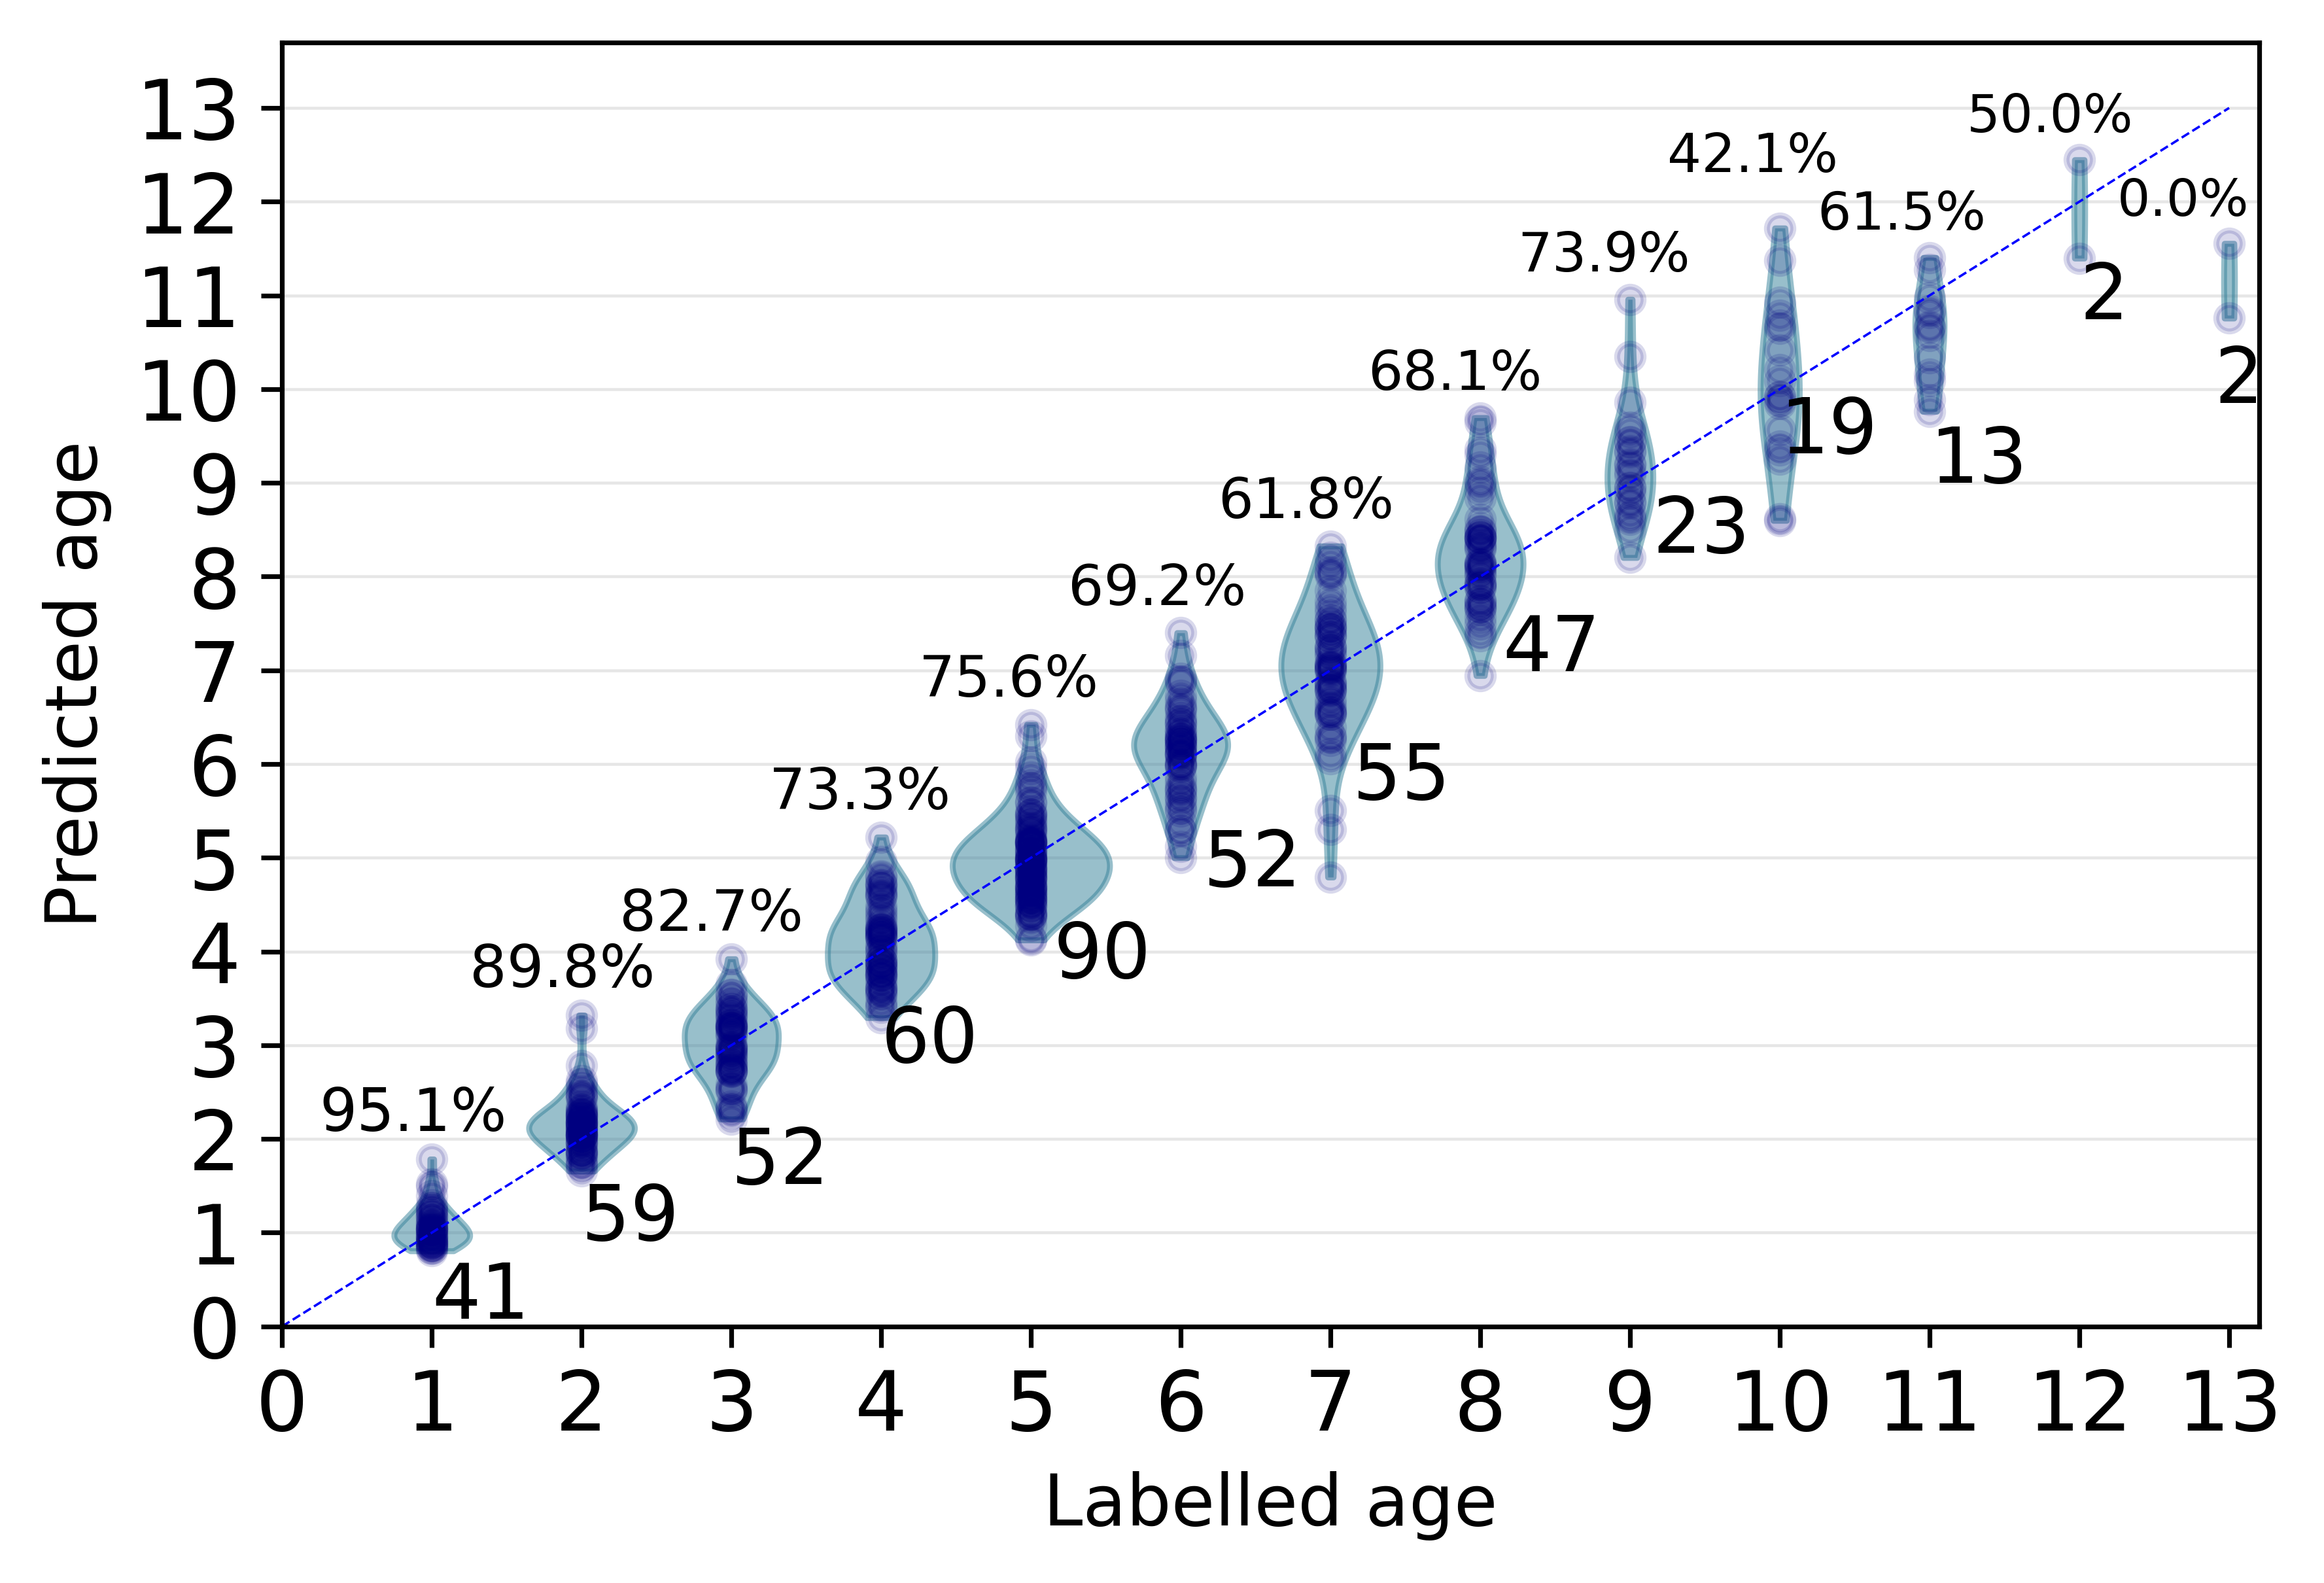

'\n#difference= calculateDifference(listpredicted,listtrue)\n # for i,x in enumerate(t):\n    #     print(f\'{i}{" : "} {x}{" --> "}{p[i]}\')\n\n# f= open(path+name,\'r\')    #.read().splitlines()\n# lines=f.readlines()\n\n\n\n        # zip_object = zip(list1, list2)\n        # d=[]\n        # for list1_i, list2_i in zip_object:\n        #     d.append(list1_i-list2_i)\n\n'

In [166]:
if __name__ == '__main__':

    # – Read values from text file
    c=3
    name= names[c]
    #name= namev2[c]

    # – Create violin object
    violin = ViolinPlot(name)

    violin.prediction, violin.values = b5_min, y_true.age.values#load_file(name, pred_filename)
    #violin.accuratePredictions()
    #
    violin.maxa= int(violin.values.max())
    print(f'{" max age: "} {violin.maxa}')

    # – Create violin distribution
    violin.list2D()
    # ~

    # Add values
    #p,v = b4_middle, y_true.age.values #load_file(names[1])
    #p3,v3 = b4_max, y_true.age.values #load_file(names[2])
    #violin.addListViolin(p)
    #violin.addListViolin(p3)
    violin.title= name
    #violin.title+=  "\n"+names[1]+"\n"+names[2]
    # Find count
    violin.findCountAndMax(False)
    #print('{"count: "}', violin.count)
    #print(violin.count)


    # – Create labels
    labels, violin.axis_label= violin.create_labels()
    violin.axis_label.append(violin.maxa)    # hacking
    violin.calculateMSE()
    violin.calculateAccuracy()

    # – The Violin Plot
    violin.plot(labels)
    # Add scatter, one point for each prediction
    violin.plotScatter(violin.values, violin.prediction)
#    violin.plotScatter(v, p)
#    violin.plotScatter(v3, p3)
    violin.plotScatterAccuracy()

    # Add x=y line plot
    plt.rcParams['figure.dpi'] = 650
    
    plt.plot(violin.axis_label,violin.axis_label,'b',label='xy', linestyle='dashed',linewidth= 0.4) #markersize=1)
    #plt.plot(t,p,'b',label='xy', linestyle='dashed',linewidth= 0.4) #markersize=1)

    # Accuracy line
    #plt.plot(labels,violin.accuracy,'r',label='Acc', linestyle='dashed',linewidth= 0.4) #markersize=1)

    # Set axis title, labels and annotation
    violin.defineAxis("Otoliths")
    violin.annotatedCount()

    plt.show()


"""
#difference= calculateDifference(listpredicted,listtrue)
 # for i,x in enumerate(t):
    #     print(f'{i}{" : "} {x}{" --> "}{p[i]}')

# f= open(path+name,'r')    #.read().splitlines()
# lines=f.readlines()



        # zip_object = zip(list1, list2)
        # d=[]
        # for list1_i, list2_i in zip_object:
        #     d.append(list1_i-list2_i)

"""

In [147]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_true.age, return_counts=True)
truths = dict(zip(unique, counts))

for j in range(1, 14):
    age_i = np.array([])
    age_i = np.append( age_i, b5_min[y_true.age==j] )
    
    acc = accuracy_score(age_i.round(), np.repeat(j, len(age_i) ))
    print(acc)

0.9512195121951219
0.8983050847457628
0.8269230769230769
0.7333333333333333
0.7555555555555555
0.6923076923076923
0.6181818181818182
0.6808510638297872
0.7391304347826086
0.42105263157894735
0.6153846153846154
0.5
0.0


In [123]:
unique, counts = np.unique(y_true.age.round().astype("int"), return_counts=True)
dict(zip(unique, counts))

{1: 41,
 2: 59,
 3: 52,
 4: 60,
 5: 90,
 6: 52,
 7: 55,
 8: 47,
 9: 23,
 10: 19,
 11: 13,
 12: 2,
 13: 2}